# Insurance Fraud Detection : Exploratory Data Analysis

In [1]:
#loading the data set :

import pandas as pd
path = "/home/omkar/Omkar Pawar/Data Science/Projects/Insurance Fraud Detection/Data/insuranceFraud.csv"
data = pd.read_csv(path)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [2]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
import numpy as np
data=data.replace('?',np.nan)

In [3]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [4]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [5]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [8]:
# data['collision_type'].replace(np.nan, data['collision_type'].mode, inplace = True)
# data['authorities_contacted'].replace(np.nan, data['authorities_contacted'].mode, inplace = True)
# data['property_damage'].replace(np.nan, data['property_damage'].mode, inplace = True)
# data['police_report_available'].replace(np.nan, data['police_report_available'].mode, inplace = True)

# data.head()  # RecursionError: maximum recursion depth exceeded while calling a Python object

There is some issue with above code. When I am trying to see data after applying above steps I am getting recursion error...???

In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [8]:
x = data.size
print(x)

# data.dropna(inplace=True) # Dropping the NaN value can sometimes cause the loss of information along with it. 

y = data.size
print(y)

print(f"we are losing {x - y} records") # dropping nan values is not worth it ... we are losing too much data. 

27000
27000
we are losing 0 records


------------

In [9]:
from sklearn.impute import SimpleImputer # Handling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
# from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline # To create pipelines for numerical and categorical data
from sklearn.compose import ColumnTransformer

In [10]:
cat_df = data.select_dtypes(include=('object'))
num_df = data.select_dtypes(include=('number'))

In [14]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,num_df),
('cat_pipeline',cat_pipeline,cat_df)
])


In [15]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [17]:
# Get all the unique values from categorical features. 
for i in cat_df.columns:
    print(f"{i}: {cat_df[i].unique()}")
    print("------------------------------") 

policy_csl: ['250/500' '100/300' '500/1000']
------------------------------
insured_sex: ['MALE' 'FEMALE']
------------------------------
insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
------------------------------
insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
------------------------------
insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
------------------------------
incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
------------------------------
collision_type: ['Side Collision' nan 'Rear Collision' 'Front Collision']
------------------------------
incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
--------

1. collision_type: ['Side Collision' nan 'Rear Collision' 'Front Collision']

If there is no collision happened in case of car then that value could have been left to be `nan`. This can be the case if car gets stolen. 

- `nan` can be replaced with 'No Collision'.

2. authorities_contacted: ['Police' nan 'Fire' 'Other' 'Ambulance']

in this case there is chance that no authority has been contacted... 

- `nan` can be replaced with "No Authority Contacted"

3.property_damage: ['YES' nan 'NO']
In this case of property damage `nan` value does not make any sense.

- is it better to drop it .... but again these are the features with most `nan` values 
4. police_report_available: ['YES' nan 'NO']

In [18]:
result = cat_df[cat_df['collision_type'].isnull()]['incident_severity']

In [20]:
result.value_counts()

incident_severity
Trivial Damage    90
Minor Damage      88
Name: count, dtype: int64

nan values are still there...???


### To determine whether missing values in categorical variables have meaning or are just random

In [30]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

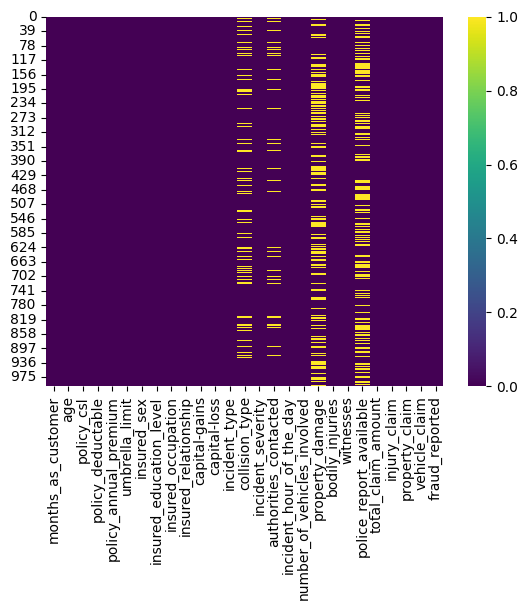

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.show()
